# Titanic Classification Model


## Import The Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

## EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
encoder = LabelEncoder()
df['Sex']=encoder.fit_transform(df.Sex)
df['Ticket']=encoder.fit_transform(df.Ticket)
df['Cabin']=encoder.fit_transform(df.Cabin)
df['Embarked']=encoder.fit_transform(df.Embarked)

In [10]:
df1= df.select_dtypes(['int','float'])

In [11]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,147,2


In [12]:
df1.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,-0.252331,-0.025252
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226
Cabin,-0.035077,-0.254888,0.684121,0.096681,-0.252331,0.043593,-0.028324,0.243696,-0.503355,1.000000,0.193205


## Visualization and Feature Selection

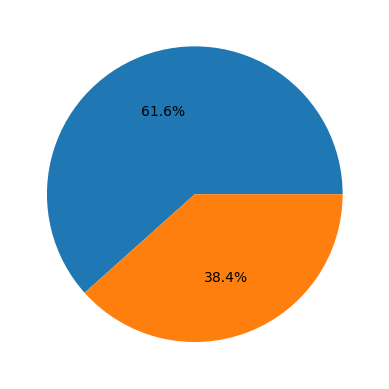

In [13]:
plt.pie(x=df['Survived'].value_counts(),data=df,autopct='%0.1f%%')
plt.show()

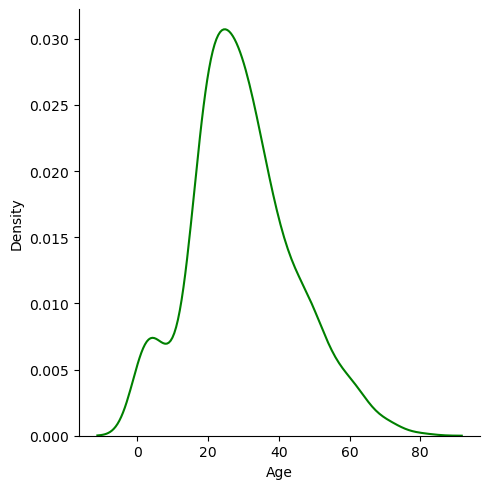

In [14]:
sns.displot(x='Age',data=df,color='green',kind='kde')
plt.show()

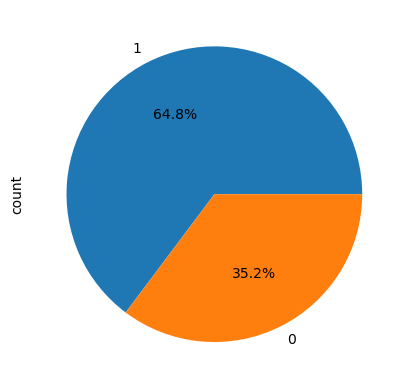

In [15]:
df['Sex'].value_counts().plot(kind='pie',color='coral',autopct='%0.1f%%')
plt.show()

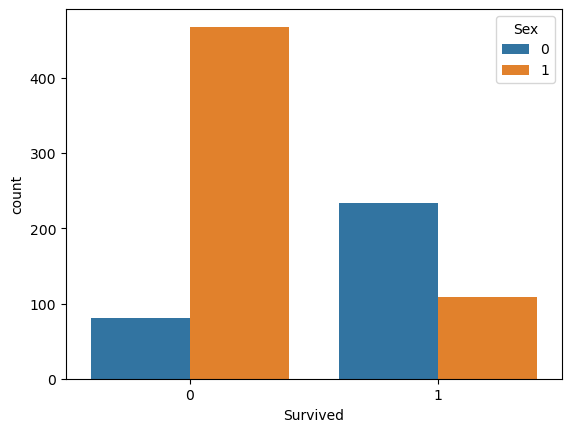

In [16]:
sns.countplot(data=df,x='Survived',hue='Sex')
plt.show()

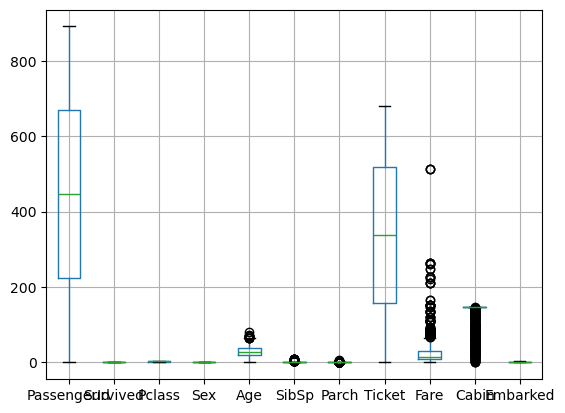

In [17]:
df1.boxplot()
plt.show()

In [18]:
x=df1[['Pclass','Sex']]

In [19]:
y=df1['Survived']

In [20]:
df1.shape

(891, 11)

## Classification by usning Logistic recression

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [22]:
logistic=LogisticRegression()

In [23]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred=logistic.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [25]:
result=confusion_matrix(y_test,y_pred)
print("confusion matrix")
print(result)
a=accuracy_score(y_test,y_pred)
print(a)

confusion matrix
[[92 18]
 [20 49]]
0.7877094972067039


In [26]:
res= logistic.predict([[1,0]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

Survived
